In [1]:
# Dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import sklearn
import sklearn.datasets
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingClassifier
np.set_printoptions(threshold=np.inf)

In [2]:
# read in data
batting = pd.read_csv("Fangraphs Leaderboard.csv")
awards = pd.read_csv("AwardsPlayers.csv")
master = pd.read_csv("Master.csv", encoding='latin-1')
team = pd.read_csv("teamResults.csv")
teamNames = pd.read_csv("Teams.csv")

In [3]:
# teamNames = teamNames.replace('ANA', 'LAA', regex = True)
# teamNames = teamNames.replace('TBD', 'TBR', regex = True)
# teamNames = teamNames.replace('FLA', 'MIA', regex = True)
# teamNames = teamNames.replace('Florida Marlins', 'Miami Marlins', regex = True)
teamNames['Win_percent'] = teamNames['W'] / (teamNames['W'] + teamNames['L'])
teamNames.rename(columns = {'name': 'Team'}, inplace = True)
teamNames.tail()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,FP,Team,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,Win_percent
2860,2017,NL,SLN,STL,C,3,162,81.0,83,79,...,0.984,St. Louis Cardinals,Busch Stadium III,3447937.0,98,98,STL,SLN,SLN,0.512346
2861,2017,AL,TBA,TBD,E,3,162,81.0,80,82,...,0.983,Tampa Bay Rays,Tropicana Field,1253619.0,94,94,TBR,TBA,TBA,0.493827
2862,2017,AL,TEX,TEX,W,4,162,81.0,78,84,...,0.982,Texas Rangers,Rangers Ballpark in Arlington,2507760.0,107,107,TEX,TEX,TEX,0.481481
2863,2017,AL,TOR,TOR,E,4,162,81.0,76,86,...,0.985,Toronto Blue Jays,Rogers Centre,3203886.0,105,105,TOR,TOR,TOR,0.469136
2864,2017,NL,WAS,WSN,E,1,162,81.0,97,65,...,0.985,Washington Nationals,Nationals Park,2524980.0,103,102,WSN,MON,WAS,0.598765


In [4]:
teamNames = teamNames.replace("Houston Astros", "Astros", regex = True)
teamNames = teamNames.replace("Oakland Athletics", "Athletics", regex = True)
teamNames = teamNames.replace("Los Angeles Angels of Anaheim", "Angels", regex = True)
teamNames = teamNames.replace("Texas Rangers", "Rangers", regex = True)
teamNames = teamNames.replace("Seattle Mariners", "Mariners", regex = True)
teamNames = teamNames.replace("Colorado Rockies", "Rockies", regex = True)
teamNames = teamNames.replace("San Francisco Giants", "Giants", regex = True)
teamNames = teamNames.replace("San Diego Padres", "Padres", regex = True)
teamNames = teamNames.replace("Los Angeles Dodgers", "Dodgers", regex = True)
teamNames = teamNames.replace("Arizona Diamondbacks", "Diamondbacks", regex = True)
teamNames = teamNames.replace("Cleveland Indians", "Indians", regex = True)
teamNames = teamNames.replace("Kansas City Royals", "Royals", regex = True)
teamNames = teamNames.replace("Minnesota Twins", "Twins", regex = True)
teamNames = teamNames.replace("Detroit Tigers", "Tigers", regex = True)
teamNames = teamNames.replace("Chicago White Sox", "White Sox", regex = True)
teamNames = teamNames.replace("Chicago Cubs", "Cubs", regex = True)
teamNames = teamNames.replace("Milwaukee Brewers", "Brewers", regex = True)
teamNames = teamNames.replace("Cincinnati Reds", "Reds", regex = True)
teamNames = teamNames.replace("Pittsburgh Pirates", "Pirates", regex = True)
teamNames = teamNames.replace("St. Louis Cardinals", "Cardinals", regex = True)
teamNames = teamNames.replace("New York Yankees", "Yankees", regex = True)
teamNames = teamNames.replace("Boston Red Sox", "Red Sox", regex = True)
teamNames = teamNames.replace("Toronto Blue Jays", "Blue Jays", regex = True)
teamNames = teamNames.replace("Baltimore Orioles", "Orioles", regex = True)
teamNames = teamNames.replace("Tampa Bay Rays", "Rays", regex = True)
teamNames = teamNames.replace("New York Mets", "Mets", regex = True)
teamNames = teamNames.replace("Philadelphia Phillies", "Phillies", regex = True)
teamNames = teamNames.replace("Miami Marlins", "Marlins", regex = True)
teamNames = teamNames.replace("Atlanta Braves", "Braves", regex = True)
teamNames = teamNames.replace("Washington Nationals", "Nationals", regex = True)
teamNames = teamNames.replace("Montreal Expos", "Expos", regex = True)

teamNames

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,FP,Team,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,Win_percent
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,0.834,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1,0.666667
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1,0.678571
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,0.818,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1,0.344828
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1,0.368421
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,0.840,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2,0.484848
5,1871,NaN,PH1,PNA,NaN,1,28,NaN,21,7,...,0.845,Philadelphia Athletics,Jefferson Street Grounds,NaN,102,98,ATH,PH1,PH1,0.750000
6,1871,NaN,RC1,ROK,NaN,9,25,NaN,4,21,...,0.821,Rockford Forest Citys,Agricultural Society Fair Grounds,NaN,97,99,ROK,RC1,RC1,0.160000
7,1871,NaN,TRO,TRO,NaN,6,29,NaN,13,15,...,0.845,Troy Haymakers,Haymakers' Grounds,NaN,101,100,TRO,TRO,TRO,0.464286
8,1871,NaN,WS3,OLY,NaN,4,32,NaN,15,15,...,0.850,Washington Olympics,Olympics Grounds,NaN,94,98,OLY,WS3,WS3,0.500000
9,1872,NaN,BL1,BLC,NaN,2,58,NaN,35,19,...,0.830,Baltimore Canaries,Newington Park,NaN,106,102,BAL,BL1,BL1,0.648148


In [5]:
master.drop(['birthYear', 'birthMonth', 'birthDay','birthCountry', 'birthState','birthCity','deathYear','deathMonth','deathDay','deathCountry','deathState','deathCity', 'debut','finalGame','retroID','bbrefID'],  axis=1, inplace=True)
awardsMVP = awards.loc[awards['awardID'] == "Most Valuable Player"]

data1 = pd.merge(awardsMVP, master, on= ['playerID'], how = 'left')
data1 = data1.loc[data1['yearID'] > 1997 ]
data1['Name'] = data1['nameFirst'] + ' ' + data1['nameLast']

batting.rename(columns = {'Season': 'yearID'}, inplace = True)

data1.drop(['tie', 'notes'], axis=1, inplace=True)


data = pd.merge(batting, data1, on= ['Name', 'yearID'], how = 'left')
data.drop(['nameFirst', 'nameLast', 'nameGiven'], axis=1, inplace=True)
data = data.replace("AL", "0", regex = True)
data = data.replace("NL", "1", regex = True)
data.to_csv('dataNames.csv')
data

,yearID,Name,Team,G,PA,HR,R,RBI,SB,BB%,...,Def,WAR,playerid,playerID,awardID,lgID,weight,height,bats,throws
0,2002,Barry Bonds,Giants,143,612,46,117,110,9,32.4 %,...,-2.0,12.7,1109,bondsba01,Most Valuable Player,1,185.0,73.0,L,L
1,2001,Barry Bonds,Giants,153,664,73,129,137,13,26.7 %,...,-12.0,12.5,1109,bondsba01,Most Valuable Player,1,185.0,73.0,L,L
2,2004,Barry Bonds,Giants,147,617,45,129,101,6,37.6 %,...,-4.4,11.9,1109,bondsba01,Most Valuable Player,1,185.0,73.0,L,L
3,2018,Mookie Betts,Red Sox,136,614,32,129,80,30,13.2 %,...,11.6,10.4,13611,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2003,Barry Bonds,Giants,130,550,45,111,90,7,26.9 %,...,5.6,10.2,1109,bondsba01,Most Valuable Player,1,185.0,73.0,L,L
5,2013,Mike Trout,Angels,157,716,27,109,97,33,15.4 %,...,0.5,10.1,10155,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2002,Alex Rodriguez,Rangers,162,725,57,125,142,9,12.0 %,...,19.6,10.0,1274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2012,Mike Trout,Angels,139,639,30,129,83,49,10.5 %,...,10.2,10.0,10155,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2001,Sammy Sosa,Cubs,160,711,64,146,160,0,16.3 %,...,-1.1,9.9,302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2018,Mike Trout,Angels,140,608,39,101,79,24,20.1 %,...,4.2,9.8,10155,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
team = team.replace("HOU", "Astros", regex = True)
team = team.replace("OAK", "Athletics", regex = True)
team = team.replace("LAA", "Angels", regex = True)
team = team.replace("TEX", "Rangers", regex = True)
team = team.replace("SEA", "Mariners", regex = True)
team = team.replace("COL", "Rockies", regex = True)
team = team.replace("SFG", "Giants", regex = True)
team = team.replace("SDP", "Padres", regex = True)
team = team.replace("LAD", "Dodgers", regex = True)
team = team.replace("ARI", "Diamondbacks", regex = True)
team = team.replace("CLE", "Indians", regex = True)
team = team.replace("KCR", "Royals", regex = True)
team = team.replace("MIN", "Twins", regex = True)
team = team.replace("DET", "Tigers", regex = True)
team = team.replace("CWS", "White Sox", regex = True)
team = team.replace("CHC", "Cubs", regex = True)
team = team.replace("MIL", "Brewers", regex = True)
team = team.replace("CIN", "Reds", regex = True)
team = team.replace("PIT", "Pirates", regex = True)
team = team.replace("STL", "Cardinals", regex = True)
team = team.replace("NYY", "Yankees", regex = True)
team = team.replace("BOS", "Red Sox", regex = True)
team = team.replace("TOR", "Blue Jays", regex = True)
team = team.replace("BAL", "Orioles", regex = True)
team = team.replace("TBD", "Rays", regex = True)
team = team.replace("TBR", "Rays", regex = True)
team = team.replace("NYM", "Mets", regex = True)
team = team.replace("PHI", "Phillies", regex = True)
team = team.replace("MIA", "Marlins", regex = True)
team = team.replace("ATL", "Braves", regex = True)
team = team.replace("WSN", "Nationals", regex = True)
team = team.replace("MON", "Expos", regex = True)

team = team.drop(team.index[0])
team.rename(columns = {'league': 'lgID', 'team': 'Team'}, inplace = True)
team = team.replace("AL", "0", regex = True)
team = team.replace("NL", "1", regex = True)
team

,Team,lgID,win_percent
1,Astros,0,0.636
2,Yankees,0,0.617
3,Athletics,0,0.599
4,Brewers,1,0.589
5,Cubs,1,0.583
6,Dodgers,1,0.564
7,Indians,0,0.562
8,Rockies,1,0.558
9,Braves,1,0.556
10,Rays,0,0.556


In [7]:
data['MVP'] = data['awardID']
dummies = data.loc[data['MVP'] == 'Most Valuable Player']
non_dummies = data.loc[data['MVP'] != 'Most Valuable Player']
dummies['MVP_dummy'] = 1
non_dummies['MVP_dummy'] = 0

data_dummies = dummies.append(non_dummies)
df = data_dummies.sort_values(by = ['yearID'])
df1 = data_dummies.sort_values(by = ['yearID'])
df1 = pd.DataFrame({"Name": df1['Name'], "playerid": df1['playerid'], "yearID": df1['yearID'], "Team": df1['Team']})
df1.head()

/Users/kevinjordan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/kevinjordan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Name,Team,playerid,yearID
2121,Andy Fox,Diamondbacks,1379,1998
118,Andruw Jones,Braves,96,1998
120,Scott Rolen,Phillies,970,1998
1243,Tim Salmon,Angels,32,1998
1262,Tony Clark,Tigers,182,1998


In [8]:
df1 = pd.merge(df1, teamNames, on = ['Team', 'yearID'], how='inner')
df1 = pd.merge(df1, team, on = ['Team'], how='inner')
print(df1)
df1 = pd.DataFrame({'Name': df1['Name'], 'Team': df1['Team'], 'playerid': df1['playerid'], 'yearID': df1['yearID'], 'Win_percent': df1['Win_percent'], 'lgID': df1['lgID_y']})
df1

                    Name          Team  playerid  yearID lgID_x teamID  \
0               Andy Fox  Diamondbacks      1379    1998     NL    ARI   
1               Jay Bell  Diamondbacks        48    1998     NL    ARI   
2          Matt Williams  Diamondbacks        77    1998     NL    ARI   
3             Travis Lee  Diamondbacks       958    1998     NL    ARI   
4            Devon White  Diamondbacks   1013862    1998     NL    ARI   
5           Steve Finley  Diamondbacks        54    1999     NL    ARI   
6          Matt Williams  Diamondbacks        77    1999     NL    ARI   
7            Tony Womack  Diamondbacks        78    1999     NL    ARI   
8          Luis Gonzalez  Diamondbacks        55    1999     NL    ARI   
9               Jay Bell  Diamondbacks        48    1999     NL    ARI   
10          Steve Finley  Diamondbacks        54    2000     NL    ARI   
11         Luis Gonzalez  Diamondbacks        55    2000     NL    ARI   
12              Jay Bell  Diamondbacks

,Name,Team,Win_percent,lgID,playerid,yearID
0,Andy Fox,Diamondbacks,0.401235,1,1379,1998
1,Jay Bell,Diamondbacks,0.401235,1,48,1998
2,Matt Williams,Diamondbacks,0.401235,1,77,1998
3,Travis Lee,Diamondbacks,0.401235,1,958,1998
4,Devon White,Diamondbacks,0.401235,1,1013862,1998
5,Steve Finley,Diamondbacks,0.617284,1,54,1999
6,Matt Williams,Diamondbacks,0.617284,1,77,1999
7,Tony Womack,Diamondbacks,0.617284,1,78,1999
8,Luis Gonzalez,Diamondbacks,0.617284,1,55,1999
9,Jay Bell,Diamondbacks,0.617284,1,48,1999


In [9]:
df.drop(['playerID','awardID', 'weight', 'height', 'bats', 'throws', 'MVP', 'BB%', 'K%', 'Name'], axis = 1, inplace = True )


In [10]:
df_2018 = df.loc[df['yearID'] == 2018]
print(df_2018)

df = pd.merge(df, df1, on = ['playerid', 'yearID', 'Team'], how = 'inner')
df.drop(['Name', 'Team', 'lgID_x'], axis=1, inplace=True)
df.head()

      yearID          Team    G   PA  HR    R  RBI  SB    ISO  BABIP  \
841     2018         - - -  137  570  21  102   63  15  0.188  0.342   
722     2018       Red Sox  148  661  16  103   87  21  0.174  0.328   
3163    2018        Tigers  133  508   9   32   54   0  0.103  0.260   
787     2018       Yankees  158  705  38  102  100   5  0.243  0.333   
1040    2018       Dodgers  162  632  25   84   76  14  0.210  0.313   
931     2018  Diamondbacks  146  614  30   75   87   4  0.223  0.328   
3       2018       Red Sox  136  614  32  129   80  30  0.294  0.368   
664     2018          Reds  154  638  23   86   92   4  0.180  0.358   
1037    2018          Cubs  139  520   9   67   58   3  0.134  0.331   
1064    2018       Brewers  152  587  32   73   86   5  0.239  0.242   
656     2018          Mets  140  535  17   77   47   9  0.219  0.351   
1074    2018       Dodgers  140  518  24   65   68   2  0.225  0.278   
1016    2018       Pirates  145  606  20   81   72  33  0.182  0

,yearID,G,PA,HR,R,RBI,SB,ISO,BABIP,AVG,...,wOBA,wRC+,BsR,Off,Def,WAR,playerid,MVP_dummy,Win_percent,lgID_y
0,1998,139,564,9,67,44,14,0.120,0.327,0.277,...,0.338,100,-0.2,-0.4,1.9,1.9,1379,0,0.401235,1
1,1998,159,631,31,89,90,27,0.244,0.298,0.271,...,0.353,113,3.7,14.0,37.4,7.0,96,0,0.654321,1
2,1998,160,711,31,120,110,14,0.243,0.329,0.290,...,0.397,140,-0.3,35.7,13.5,7.0,970,0,0.462963,1
3,1998,157,673,34,84,103,3,0.231,0.317,0.291,...,0.377,124,-0.7,20.1,-10.1,3.3,182,0,0.401235,0
4,1998,142,636,4,67,36,42,0.079,0.295,0.254,...,0.283,64,3.2,-26.8,19.1,1.4,562,0,0.401235,0


In [11]:
df_2018 = pd.merge(df_2018, team, on=['Team'], how='left')
df_2018.drop(['lgID_x', 'Team'], axis=1, inplace=True)
df_2018 = df_2018.fillna(0)
df_2018

,yearID,G,PA,HR,R,RBI,SB,ISO,BABIP,AVG,...,wOBA,wRC+,BsR,Off,Def,WAR,playerid,MVP_dummy,lgID_y,win_percent
0,2018,137,570,21,102,63,15,0.188,0.342,0.275,...,0.359,129,2.2,21.7,-0.7,4.0,2967,0,0,0.000
1,2018,148,661,16,103,87,21,0.174,0.328,0.290,...,0.357,122,4.3,21.9,-1.5,4.3,17901,0,0,0.000
2,2018,133,508,9,32,54,0,0.103,0.260,0.251,...,0.281,75,-4.1,-19.5,-13.3,-1.7,393,0,0,0.395
3,2018,158,705,38,102,100,5,0.243,0.333,0.266,...,0.360,127,-0.1,22.8,-5.3,4.2,4949,0,0,0.617
4,2018,162,632,25,84,76,14,0.210,0.313,0.260,...,0.345,120,4.1,19.8,-4.5,3.6,15998,0,1,0.564
5,2018,146,614,30,75,87,4,0.223,0.328,0.293,...,0.368,130,0.3,22.8,-4.9,3.8,2136,0,1,0.506
6,2018,136,614,32,129,80,30,0.294,0.368,0.346,...,0.449,185,6.9,69.1,11.6,10.4,13611,0,0,0.000
7,2018,154,638,23,86,92,4,0.180,0.358,0.310,...,0.362,125,0.1,19.9,3.9,4.5,10339,0,1,0.414
8,2018,139,520,9,67,58,3,0.134,0.331,0.305,...,0.355,123,0.5,14.9,4.0,3.6,7435,0,1,0.583
9,2018,152,587,32,73,86,5,0.239,0.242,0.241,...,0.351,119,0.6,13.9,2.5,3.6,11982,0,1,0.589


In [12]:
# df.drop(['lgID'], axis = 1, inplace = True)
df['G'] = df.groupby(['yearID', 'lgID_y'])['G'].rank(ascending=False)
df['PA'] = df.groupby(['yearID', 'lgID_y'])['PA'].rank(ascending=False)
df['HR'] = df.groupby(['yearID', 'lgID_y'])['HR'].rank(ascending=False)
df['R'] = df.groupby(['yearID', 'lgID_y'])['R'].rank(ascending=False)
df['RBI'] = df.groupby(['yearID', 'lgID_y'])['RBI'].rank(ascending=False)
df['SB'] = df.groupby(['yearID', 'lgID_y'])['SB'].rank(ascending=False)
df['ISO'] = df.groupby(['yearID', 'lgID_y'])['ISO'].rank(ascending=False)
df['BABIP'] = df.groupby(['yearID', 'lgID_y'])['BABIP'].rank(ascending=False)
df['AVG'] = df.groupby(['yearID', 'lgID_y'])['AVG'].rank(ascending=False)
df['OBP'] = df.groupby(['yearID', 'lgID_y'])['OBP'].rank(ascending=False)
df['SLG'] = df.groupby(['yearID', 'lgID_y'])['SLG'].rank(ascending=False)
df['wOBA'] = df.groupby(['yearID', 'lgID_y'])['wOBA'].rank(ascending=False)
df['wRC+'] = df.groupby(['yearID', 'lgID_y'])['wRC+'].rank(ascending=False)
df['BsR'] = df.groupby(['yearID', 'lgID_y'])['BsR'].rank(ascending=False)
df['Off'] = df.groupby(['yearID', 'lgID_y'])['Off'].rank(ascending=False)
df['Def'] = df.groupby(['yearID', 'lgID_y'])['Def'].rank(ascending=False)
df['WAR'] = df.groupby(['yearID', 'lgID_y'])['WAR'].rank(ascending=False)
print(df.tail())

      yearID     G    PA    HR     R   RBI    SB   ISO  BABIP   AVG   ...    \
2426    2017  49.5  47.5  37.0  52.5  20.0  25.0  39.0   53.0  33.5   ...     
2427    2017   2.0  32.0  63.0  46.5  56.0  37.5  62.5   37.5  45.5   ...     
2428    2017  59.0  62.0  54.0  59.5  58.5  60.0  51.0   55.0  58.0   ...     
2429    2017  33.5  39.0  27.5  55.0  32.5  60.0  34.5   16.5  32.5   ...     
2430    2017  58.5  60.0  37.0  62.0  41.5  47.0  41.0   61.0  48.5   ...     

      wOBA  wRC+   BsR   Off   Def   WAR  playerid  MVP_dummy  Win_percent  \
2426  49.0  48.5  58.0  53.0   4.5  37.5      7007          0     0.512346   
2427  62.5  61.5  12.5  62.0  11.0  53.0      6310          0     0.493827   
2428  60.0  60.0  52.0  58.0  49.0  60.0       589          0     0.623457   
2429  44.5  44.5  47.0  45.0  59.0  52.0     15447          0     0.462963   
2430  52.0  50.0  52.5  50.0  35.0  54.5      5352          0     0.438272   

      lgID_y  
2426       1  
2427       0  
2428       

In [13]:
df_2018['G'] = df_2018.groupby(['yearID', 'lgID_y'])['G'].rank(ascending=False)
df_2018['PA'] = df_2018.groupby(['yearID', 'lgID_y'])['PA'].rank(ascending=False)
df_2018['HR'] = df_2018.groupby(['yearID', 'lgID_y'])['HR'].rank(ascending=False)
df_2018['R'] = df_2018.groupby(['yearID', 'lgID_y'])['R'].rank(ascending=False)
df_2018['RBI'] = df_2018.groupby(['yearID', 'lgID_y'])['RBI'].rank(ascending=False)
df_2018['SB'] = df_2018.groupby(['yearID', 'lgID_y'])['SB'].rank(ascending=False)
df_2018['ISO'] = df_2018.groupby(['yearID', 'lgID_y'])['ISO'].rank(ascending=False)
df_2018['BABIP'] = df_2018.groupby(['yearID', 'lgID_y'])['BABIP'].rank(ascending=False)
df_2018['AVG'] = df_2018.groupby(['yearID', 'lgID_y'])['AVG'].rank(ascending=False)
df_2018['OBP'] = df_2018.groupby(['yearID', 'lgID_y'])['OBP'].rank(ascending=False)
df_2018['SLG'] = df_2018.groupby(['yearID', 'lgID_y'])['SLG'].rank(ascending=False)
df_2018['wOBA'] = df_2018.groupby(['yearID', 'lgID_y'])['wOBA'].rank(ascending=False)
df_2018['wRC+'] = df_2018.groupby(['yearID', 'lgID_y'])['wRC+'].rank(ascending=False)
df_2018['BsR'] = df_2018.groupby(['yearID', 'lgID_y'])['BsR'].rank(ascending=False)
df_2018['Off'] = df_2018.groupby(['yearID', 'lgID_y'])['Off'].rank(ascending=False)
df_2018['Def'] = df_2018.groupby(['yearID', 'lgID_y'])['Def'].rank(ascending=False)
df_2018['WAR'] = df_2018.groupby(['yearID', 'lgID_y'])['WAR'].rank(ascending=False)
df_2018

,yearID,G,PA,HR,R,RBI,SB,ISO,BABIP,AVG,...,wOBA,wRC+,BsR,Off,Def,WAR,playerid,MVP_dummy,lgID_y,win_percent
0,2018,16.0,15.0,9.5,4.0,13.0,7.0,9.0,4.0,6.0,...,5.0,5.0,6.5,5.0,12.0,6.0,2967,0,0,0.000
1,2018,10.0,4.0,15.0,3.0,5.0,4.0,12.0,6.0,4.0,...,6.0,6.0,3.0,4.0,14.5,5.0,17901,0,0,0.000
2,2018,50.5,57.0,52.0,58.0,49.5,54.5,54.0,47.0,36.0,...,55.0,56.0,51.0,55.0,49.0,57.0,393,0,0,0.395
3,2018,4.0,3.5,5.5,4.5,5.0,32.0,7.0,10.0,25.0,...,12.5,12.5,33.0,11.0,35.0,13.0,4949,0,0,0.617
4,2018,3.0,25.0,16.5,21.0,25.5,13.5,19.0,27.5,36.5,...,28.5,25.5,12.0,18.0,40.0,19.5,15998,0,1,0.564
5,2018,41.5,30.0,12.0,33.5,16.0,39.0,16.0,19.0,11.0,...,13.5,13.0,29.0,13.0,41.0,15.5,2136,0,1,0.506
6,2018,17.5,10.0,3.0,1.0,7.0,2.0,2.0,2.0,1.0,...,1.0,1.0,1.0,1.0,1.5,1.0,13611,0,0,0.000
7,2018,23.0,23.5,23.5,18.0,12.5,39.0,31.0,3.5,2.0,...,17.0,18.5,31.5,16.5,23.0,12.5,10339,0,1,0.414
8,2018,50.0,56.0,59.5,44.5,48.5,45.0,51.0,16.0,6.5,...,21.0,22.5,27.0,23.5,22.0,19.5,7435,0,1,0.583
9,2018,32.5,39.0,11.0,39.0,17.5,33.5,12.0,61.0,55.5,...,25.0,27.0,26.0,27.0,31.0,19.5,11982,0,1,0.589


In [14]:
df.to_csv("training_data.csv")
df_2018.to_csv("testing_data.csv")

In [15]:
X_train = df.drop("MVP_dummy", axis=1)
y_train = df["MVP_dummy"]
print(X_train.shape, y_train.shape)

(2431, 21) (2431,)


In [16]:
X_train.to_csv("X_train.csv")
y_train.to_csv("y_train.csv")

In [17]:
df1.to_csv("training_data_names.csv")

In [18]:

#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create Gradient Boosting Classifier object
model= GradientBoostingClassifier(n_estimators=10000, learning_rate=0.1, max_depth=1, random_state=0)
# Train the model using the training sets and check score
model.fit(X_train, y_train)
print(model.score(X_train,y_train))
#Predict Output
predicted= model.predict(X_train)
res = y_train - predicted
rmse = math.sqrt(sum(res**2))
print(f"RMSE = {rmse}" )
print(predicted)
print(y_train.tolist())
results = pd.DataFrame({"playerid": X_train['playerid'], "Prediction": predicted, "Actual": y_train, "yearID": X_train['yearID'], 'lgID': X_train['lgID_y']}).reset_index(drop=True)


1.0
RMSE = 0.0
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0

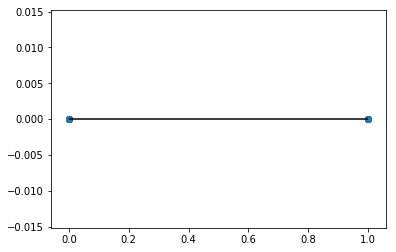

In [19]:
# plot residuals
plt.scatter(predicted, res)
plt.hlines(y=0, xmin=predicted.min(), xmax=predicted.max())
plt.show()

In [20]:
winners = results.loc[results['Actual'] == 1]
print(winners)
winners.count()

      Actual  Prediction lgID  playerid  yearID
85         1           1    0      1251    1998
96         1           1    1       302    1998
206        1           1    1        97    1999
209        1           1    0      1275    1999
342        1           1    1      1119    2000
343        1           1    0       818    2000
392        1           1    0      1101    2001
399        1           1    1      1109    2001
552        1           1    1      1109    2002
558        1           1    0       941    2002
663        1           1    1      1109    2003
700        1           1    0      1274    2003
810        1           1    1      1109    2004
862        1           1    0      1274    2005
940        1           1    1      1177    2005
1032       1           1    0      1737    2006
1059       1           1    1      2154    2006
1089       1           1    0      1274    2007
1197       1           1    1       971    2007
1317       1           1    1      1177 

Actual        34
Prediction    34
lgID          34
playerid      34
yearID        34
dtype: int64

['yearID', 'G', 'PA', 'HR', 'R', 'RBI', 'SB', 'ISO', 'BABIP', 'AVG', 'OBP', 'SLG', 'wOBA', 'wRC+', 'BsR', 'Off', 'Def', 'WAR', 'playerid', 'Win_percent', 'lgID_y']


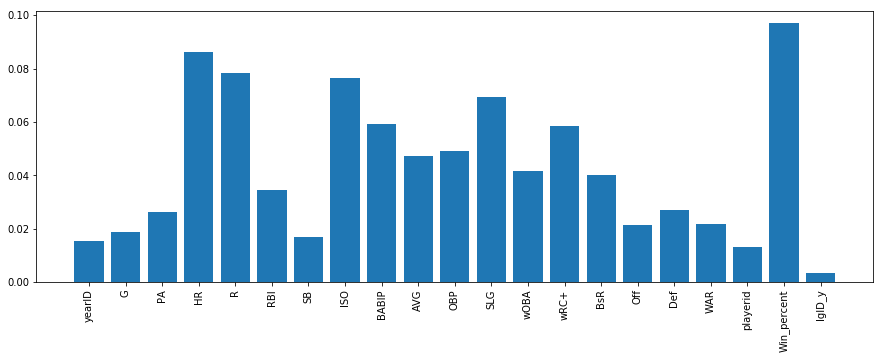

In [21]:
# plot
plt.figure(1, figsize=(15, 5))
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
labels = list(X_train)
print(labels)
plt.xticks(range(len(model.feature_importances_)), labels, rotation='vertical')
plt.show()

In [22]:
winnersNames = pd.merge(winners, df1, on=['playerid', 'yearID'], how='inner').drop_duplicates()
winnersNames

,Actual,Prediction,lgID_x,playerid,yearID,Name,Team,Win_percent,lgID_y
0,1,1,0,1251,1998,Juan Gonzalez,Rangers,0.543210,0
1,1,1,1,302,1998,Sammy Sosa,Cubs,0.552147,1
2,1,1,1,97,1999,Chipper Jones,Braves,0.635802,1
3,1,1,0,1275,1999,Ivan Rodriguez,Rangers,0.586420,0
4,1,1,1,1119,2000,Jeff Kent,Giants,0.598765,1
5,1,1,0,818,2000,Jason Giambi,Athletics,0.565217,0
6,1,1,0,1101,2001,Ichiro Suzuki,Mariners,0.716049,0
7,1,1,1,1109,2001,Barry Bonds,Giants,0.555556,1
8,1,1,1,1109,2002,Barry Bonds,Giants,0.590062,1
9,1,1,0,941,2002,Miguel Tejada,Athletics,0.635802,0


In [23]:
X = df_2018.drop("MVP_dummy", axis=1)
y = df_2018['MVP_dummy']

X.to_csv("X_test.csv")
y.to_csv("y_test.csv")

print(X.shape, y.shape)
predict = model.predict_proba(X)
print(type(predict))

(140, 21) (140,)
<class 'numpy.ndarray'>


In [24]:
predict = pd.DataFrame(predict, columns = ["prob", "non-prob"])
results = pd.DataFrame({"playerid": X['playerid'], "prob": predict['prob'], 'lgID': X['lgID_y']})

results = results.sort_values(by = 'prob')
print(results.head(50))
NL = results.loc[results['lgID'] == 1]
AL = results.loc[results['lgID'] == 0]
# df_predict

    lgID  playerid          prob
87     1     11477  8.655496e-10
6      0     13611  4.232516e-06
32     0     10155  5.635454e-01
46     1     12979  6.063951e-01
123    1     12564  6.311440e-01
74     1     12861  9.379287e-01
53     1      5361  9.891138e-01
134    1      5930  9.948301e-01
36     1      5631  9.974712e-01
85     1      9218  9.990505e-01
121    1      7996  9.990561e-01
101    1     16252  9.994804e-01
82     1     10199  9.994838e-01
93     1     10762  9.995211e-01
7      1     10339  9.996233e-01
111    1     13593  9.997122e-01
133    1      3516  9.998505e-01
95     1      7859  9.999038e-01
5      1      2136  9.999115e-01
105    1      4922  9.999115e-01
88     1     10324  9.999297e-01
45     1      9777  9.999342e-01
66     1     10542  9.999647e-01
60     1     15518  9.999743e-01
35     1      9077  9.999842e-01
84     1     10556  9.999912e-01
27     1      6885  9.999937e-01
67     1     13145  9.999949e-01
83     0      6184  9.999959e-01
110    1  

In [25]:
winnersNames = pd.merge(results, data, on=['playerid'], how='inner').drop_duplicates()
# winnersNames
resultsTable = pd.DataFrame({'lgID': results['lgID'], 'playerid': results['playerid'], 'prob': results['prob'], 'Name': winnersNames['Name']})
Names = resultsTable['Name'].drop_duplicates()
resultsTable = pd.DataFrame({'lgID': results['lgID'], 'playerid': results['playerid'], 'prob': results['prob'], 'Name': Names})
results = resultsTable.dropna()


In [26]:
results


,Name,lgID,playerid,prob
0,Christian Yelich,0,2967.0,1.000000
5,Mookie Betts,1,2136.0,0.999911
9,Mike Trout,1,11982.0,1.000000
16,Javier Baez,0,5933.0,1.000000
18,Trevor Story,1,14950.0,1.000000
20,Anthony Rendon,0,6153.0,1.000000
24,Freddie Freeman,0,13608.0,1.000000
31,Nick Markakis,1,11579.0,1.000000
43,Matt Kemp,0,10847.0,1.000000
51,Paul Goldschmidt,0,12434.0,1.000000
